In [2]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3

3.7.7 (default, May  6 2020, 04:59:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pjr3.py complete


In [3]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [4]:
findNiceContours?

Signature: findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
Docstring:
Find Nice Contours
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
nlevs = approximate number of contour levels to return (default 10)
rmClev = if defined delete the contour level near this value
sym = if defined make the contour intervals symmetric about zero
verbose = if defined, print out some info to help debug
File:      ~/Python/pjr3.py
Type:      function


In [5]:
plotZMf?

Signature:
plotZMf(
    data,
    x,
    y,
    plotOpt=None,
    modelLevels=None,
    surfacePressure=None,
    axesa=None,
    fig=None,
)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the to

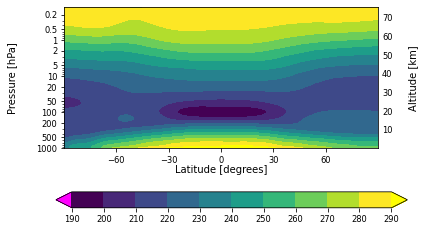

In [6]:
DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
plotZMf(vals, lat, lev)


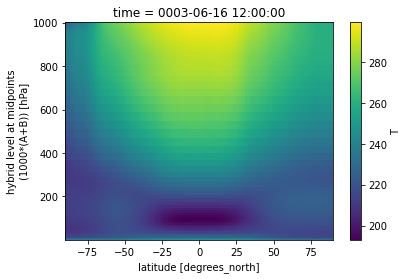

In [7]:
TZ.plot()
plt.show()

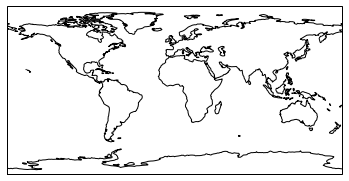

In [8]:
da = DS.PS# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 



#da.plot()
plt.show()

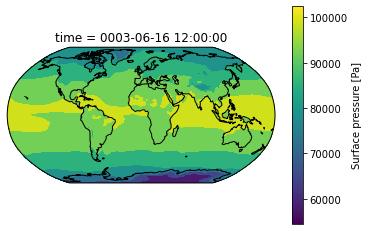

In [9]:
TS = DS.TS# Draw coastlines of the Earth
TS = TS.isel(time=0)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
lon = TS['lon']
lat = TS['lat']
ax.contourf(lon, lat, TS, transform=ccrs.PlateCarree())

da.plot()
plt.show()

In [23]:
hyai = DS.hyai
hyam = DS.hyam
#print (hyai)
#print (hyam)
print('first two hyai', hyai[0],hyai[1])
print('mean',(hyai[0]+hyai[1])/2.)
print('first two hyam',hyam[0],hyam[1])
print('mean',(hyam[0]+hyam[1])/2.)

first two hyai <xarray.DataArray 'hyai' ()>
array(0.0001)
Coordinates:
    ilev     float64 0.1
Attributes:
    long_name:  hybrid A coefficient at layer interfaces <xarray.DataArray 'hyai' ()>
array(0.000148)
Coordinates:
    ilev     float64 0.1477
Attributes:
    long_name:  hybrid A coefficient at layer interfaces
mean <xarray.DataArray 'hyai' ()>
array(0.00012383)
first two hyam <xarray.DataArray 'hyam' ()>
array(0.000124)
Coordinates:
    lev      float64 0.1238
Attributes:
    long_name:  hybrid A coefficient at layer midpoints <xarray.DataArray 'hyam' ()>
array(0.000183)
Coordinates:
    lev      float64 0.1828
Attributes:
    long_name:  hybrid A coefficient at layer midpoints
mean <xarray.DataArray 'hyam' ()>
array(0.00015333)
